# CHAPTER 4


# Evaluation Metrics for Classification

## 4.1 Note on Evaluation Metrics
____

In the previous chapter, we learned about the different classification algorithms and how to implement them in Python. In this chapter, we will learn about the evaluation metrics for classification algorithms. We will learn about the different metrics used to evaluate the performance of classification algorithms. We will also learn how to implement these metrics in Python.


In [65]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline


import warnings 
warnings.filterwarnings('ignore')


In [66]:
df = pd.read_csv(r'/Users/teslim/OneDrive/mlzoomcamp/data-week-3.csv')

In [67]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')
df.totalcharges = df.totalcharges.fillna(0)

df.churn = (df.churn == 'yes').astype(int)

In [68]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

del df_train['churn']
del df_val['churn']
del df_test['churn']

In [69]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

categorical = [
    'gender',
    'seniorcitizen',
    'partner',
    'dependents',
    'phoneservice',
    'multiplelines',
    'internetservice',
    'onlinesecurity',
    'onlinebackup',
    'deviceprotection',
    'techsupport',
    'streamingtv',
    'streamingmovies',
    'contract',
    'paperlessbilling',
    'paymentmethod',
]

In [70]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [71]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:, 1]
churn_decision = (y_pred >= 0.5)
(y_val == churn_decision).mean()

0.8026969481902059

## 4.2 Accuracy and dummy model
____


* Evaluate the model on different thresholds
* Check the accuracy of dummy baselines

In [72]:
# commpute the accuracy of the model
y_pred = model.predict_proba(X_val)[:, 1]
churn = y_pred >= 0.5
(churn == y_val).mean()

0.8026969481902059

In [73]:
# This can cbe computed using the below code

(y_val == churn_decision).mean()

0.8026969481902059

In [74]:
# importing accuracy score from sklearn
from sklearn.metrics import accuracy_score

In [75]:
# computing the accuracy of the model using the accuracy_score from sklearn
accuracy_score(y_val, y_pred >= 0.5)

0.8026969481902059

In [76]:
# computing the accuracy of the model using the accuracy_score from sklearn
"""
Computes the accuracy of a model using `accuracy_score` from `sklearn` by iterating through a range of thresholds.

This script performs the following steps:
1. Defines a range of thresholds from 0 to 1, inclusive, with 21 evenly spaced values.
2. Initializes an empty list to store accuracy scores.
3. Iterates through each threshold value, computes the accuracy score for the model predictions at that threshold, prints the threshold and corresponding accuracy score, and appends the score to the list.

Variables:
    thresholds (numpy.ndarray): Array of threshold values ranging from 0 to 1.
    scores (list): List to store accuracy scores for each threshold.
    t (float): Current threshold value in the iteration.
    score (float): Accuracy score for the current threshold.

Parameters:
    y_val (array-like): True labels of the validation set.
    y_pred (array-like): Predicted probabilities or scores from the model.

Returns:
    None
"""
# iterating through the threshold to get the best threshold
thresholds = np.linspace(0, 1, 21)

scores = []

for t in thresholds:
    score = accuracy_score(y_val, y_pred >= t)
    print('%.2f %.3f' % (t, score))
    scores.append(score)

0.00 0.274
0.05 0.510
0.10 0.592
0.15 0.667
0.20 0.710
0.25 0.738
0.30 0.760
0.35 0.772
0.40 0.785
0.45 0.793
0.50 0.803
0.55 0.801
0.60 0.795
0.65 0.786
0.70 0.766
0.75 0.744
0.80 0.735
0.85 0.726
0.90 0.726
0.95 0.726
1.00 0.726


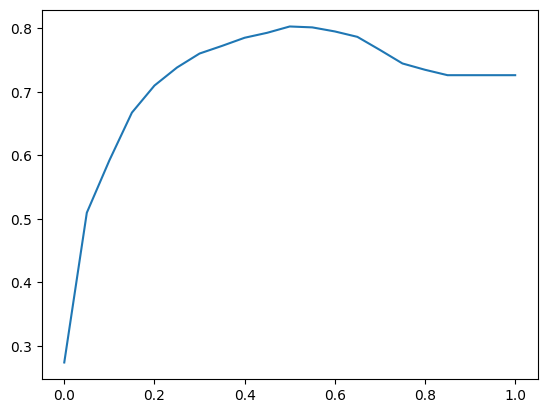

In [77]:
# plotting the threshold against the accuracy score
plt.plot(thresholds, scores)

In [78]:
from collections import Counter
Counter(y_pred >= 1.0)

Counter({False: 1409})

In [79]:
1 - y_val.mean()

0.7260468417317246

## 4.3 Confusion Matrix
____

The confusion matrix is a table that is often used to describe the performance of a classification model on a set of data for which the true values are known. It allows the visualization of the performance of an algorithm. The confusion matrix shows the ways in which the classification model makes errors. It is a table with four different combinations of predicted and actual values.

The table has four cells, each representing a different combination of predicted and actual values. The four cells are:

* True Positive (TP): The number of observations that were correctly predicted as positive.
* True Negative (TN): The number of observations that were correctly predicted as negative.
* False Positive (FP): The number of observations that were incorrectly predicted as positive.
* False Negative (FN): The number of observations that were incorrectly predicted as negative.

In [80]:
# confusion matrix for actual positive and actual negative
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

In [81]:
# confusion matrix for predicted positive and predicted negative
t = 0.5
predict_positive = (y_pred >= t)
predict_negative = (y_pred < t)

In [82]:
# True positive
tp = (predict_positive & actual_positive).sum()

# True negative
tn = (predict_negative & actual_negative).sum()

# False positive
fp = (predict_positive & actual_negative).sum()

# False negative
fn = (predict_negative & actual_positive).sum()

In [83]:
# confusion matrix
confusion_matrix = np.array([
    [tn, fp],
    [fn, tp]
])
confusion_matrix

array([[921, 102],
       [176, 210]])

In [84]:
# converting the confusion matrix to a % value
confusion_matrix_insight =  confusion_matrix / confusion_matrix.sum()

confusion_matrix_insight.round(2)

array([[0.65, 0.07],
       [0.12, 0.15]])

## 4.4 Precision and Recall
____

The precision and recall are two important metrics used to evaluate the performance of classification algorithms. 

- Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. It is the ratio of true positives to the sum of true positives and false positives. 

- Recall is the ratio of correctly predicted positive observations to the total actual positive observations. It is the ratio of true positives to the sum of true positives and false negatives.

In [85]:
p = tp / (tp + fp)
p

0.6730769230769231

In [86]:
r = tp / (tp + fn)
r

0.5440414507772021

## 4.5 ROC Curves
____

The ROC curve is a graphical representation of the performance of a classification model. It shows the trade-off between the true positive rate (TPR) and the false positive rate (FPR) at different thresholds. The ROC curve is a useful tool for comparing the performance of different classification algorithms.

The area under the ROC curve (AUC) is a measure of the performance of a classification model. It is a value between 0 and 1, with higher values indicating better performance. A model with an AUC of 1 is perfect, while a model with an AUC of 0.5 is no better than random guessing.

In [87]:
# compute the true positive rate
tpr = tp / (tp + fn)
tpr

0.5440414507772021

In [88]:
# compute the false positive rate
fpr = fp / (fp + tn)
fpr

0.09970674486803519

Evaluating a model at different thresholds can help us understand how the model performs at different levels of sensitivity and specificity. The ROC curve is a useful tool for visualizing this trade-off.
The code  below shows how to compute the confusion matrix, precision, recall, and ROC curve for a classification model in Python.

In [89]:
scores = []

thresholds = np.linspace(0, 1, 101)

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    
    scores.append((t, tp, fp, fn, tn))

In [90]:
scores

[(0.0, 386, 1023, 0, 0),
 (0.01, 385, 912, 1, 111),
 (0.02, 384, 830, 2, 193),
 (0.03, 383, 766, 3, 257),
 (0.04, 381, 715, 5, 308),
 (0.05, 379, 684, 7, 339),
 (0.06, 377, 660, 9, 363),
 (0.07, 371, 642, 15, 381),
 (0.08, 371, 612, 15, 411),
 (0.09, 369, 580, 17, 443),
 (0.1, 366, 555, 20, 468),
 (0.11, 365, 528, 21, 495),
 (0.12, 364, 509, 22, 514),
 (0.13, 360, 476, 26, 547),
 (0.14, 355, 453, 31, 570),
 (0.15, 351, 434, 35, 589),
 (0.16, 347, 420, 39, 603),
 (0.17, 346, 401, 40, 622),
 (0.18, 344, 384, 42, 639),
 (0.19, 338, 368, 48, 655),
 (0.2, 333, 356, 53, 667),
 (0.21, 330, 341, 56, 682),
 (0.22, 323, 322, 63, 701),
 (0.23, 320, 313, 66, 710),
 (0.24, 316, 304, 70, 719),
 (0.25, 309, 292, 77, 731),
 (0.26, 304, 281, 82, 742),
 (0.27, 303, 270, 83, 753),
 (0.28, 295, 255, 91, 768),
 (0.29, 291, 244, 95, 779),
 (0.3, 284, 236, 102, 787),
 (0.31, 280, 230, 106, 793),
 (0.32, 278, 226, 108, 797),
 (0.33, 276, 221, 110, 802),
 (0.34, 274, 212, 112, 811),
 (0.35000000000000003, 272,

In [91]:
columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores

,threshold,tp,fp,fn,tn
0,0.00,386,1023,0,0
1,0.01,385,912,1,111
2,0.02,384,830,2,193
3,0.03,383,766,3,257
4,0.04,381,715,5,308
...,...,...,...,...,...
96,0.96,0,0,386,1023
97,0.97,0,0,386,1023
98,0.98,0,0,386,1023
99,0.99,0,0,386,1023


In [92]:
df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)
df_scores[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,366,555,20,468,0.948187,0.542522
20,0.2,333,356,53,667,0.862694,0.347996
30,0.3,284,236,102,787,0.735751,0.230694
40,0.4,249,166,137,857,0.645078,0.162268
50,0.5,210,102,176,921,0.544041,0.099707
60,0.6,150,53,236,970,0.388601,0.051808
70,0.7,76,20,310,1003,0.196891,0.019550
80,0.8,14,2,372,1021,0.036269,0.001955
90,0.9,0,0,386,1023,0.000000,0.000000


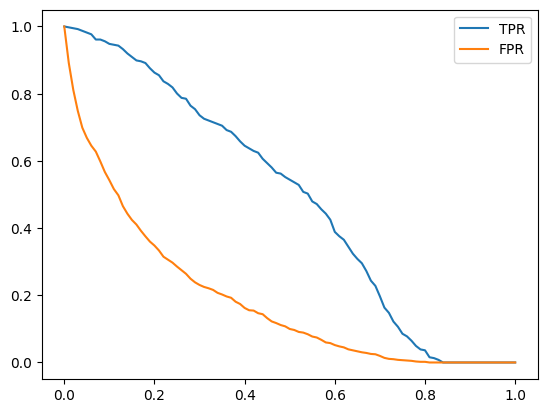

In [93]:
plt.plot(df_scores.threshold, df_scores['tpr'], label='TPR')
plt.plot(df_scores.threshold, df_scores['fpr'], label='FPR')
plt.legend()

#### Random Model ROC Curve

The ROC curve of a random model is a straight line with an AUC of 0.5. This is because a random model has no predictive power, so the true positive rate and false positive rate are equal at all thresholds.



In [94]:
# Generate a random array of values
np.random.seed(1)
y_rand = np.random.uniform(0, 1, size=len(y_val))
y_rand

array([4.17022005e-01, 7.20324493e-01, 1.14374817e-04, ...,
       7.73916250e-01, 3.34276405e-01, 8.89982208e-02])

In [95]:
# Compute the accuracy of the random model
((y_rand >= 0.5) == y_val).mean()

0.5017743080198722

In [96]:
# compute the confusion matrix for the random model
def tpr_fpr_dataframe(y_val, y_pred):
    scores = []

    thresholds = np.linspace(0, 1, 101)

    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)

        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)

        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()

        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()

        scores.append((t, tp, fp, fn, tn))

    columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns=columns)

    df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
    df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)
    
    return df_scores



In [97]:
# compute the confusion matrix for the random model
df_rand = tpr_fpr_dataframe(y_val, y_rand)
df_rand

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.00,386,1023,0,0,1.000000,1.000000
1,0.01,382,1013,4,10,0.989637,0.990225
2,0.02,379,993,7,30,0.981865,0.970674
3,0.03,375,979,11,44,0.971503,0.956989
4,0.04,372,969,14,54,0.963731,0.947214
...,...,...,...,...,...,...,...
96,0.96,14,41,372,982,0.036269,0.040078
97,0.97,11,36,375,987,0.028497,0.035191
98,0.98,8,19,378,1004,0.020725,0.018573
99,0.99,6,7,380,1016,0.015544,0.006843


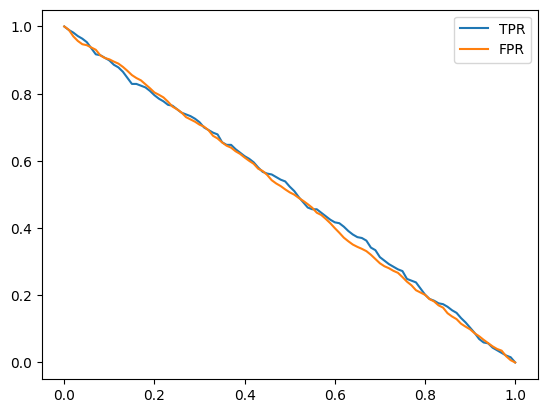

In [98]:
plt.plot(df_rand.threshold, df_rand['tpr'], label='TPR')
plt.plot(df_rand.threshold, df_rand['fpr'], label='FPR')
plt.legend()

### ideal Model 

In [99]:
# number of positive and negative values in the validation set
num_neg = (y_val == 0).sum()
num_pos = (y_val == 1).sum()
num_neg, num_pos

(1023, 386)

In [100]:
# ideal model
y_ideal = np.repeat([0, 1], [num_neg, num_pos])
y_ideal


array([0, 0, 0, ..., 1, 1, 1])

In [101]:
y_ideal_pred = np.linspace(0, 1, len(y_val))
y_ideal_pred

array([0.00000000e+00, 7.10227273e-04, 1.42045455e-03, ...,
       9.98579545e-01, 9.99289773e-01, 1.00000000e+00])

In [102]:
1 - y_val.mean()

0.7260468417317246

In [103]:
accuracy_score(y_ideal, y_ideal_pred >= 0.726)

1.0

In [104]:
df_ideal = tpr_fpr_dataframe(y_ideal, y_ideal_pred)
df_ideal[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,386,882,0,141,1.000000,0.862170
20,0.2,386,741,0,282,1.000000,0.724340
30,0.3,386,600,0,423,1.000000,0.586510
40,0.4,386,459,0,564,1.000000,0.448680
50,0.5,386,319,0,704,1.000000,0.311828
60,0.6,386,178,0,845,1.000000,0.173998
70,0.7,386,37,0,986,1.000000,0.036168
80,0.8,282,0,104,1023,0.730570,0.000000
90,0.9,141,0,245,1023,0.365285,0.000000


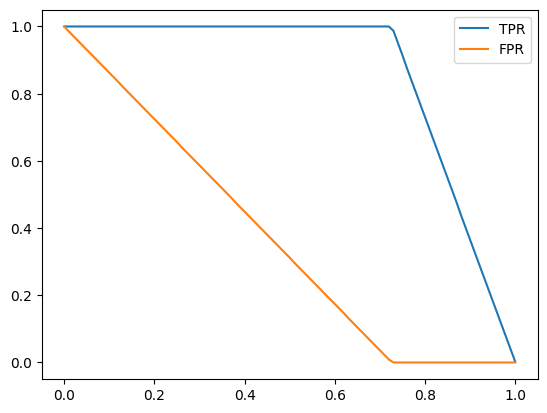

In [105]:
plt.plot(df_ideal.threshold, df_ideal['tpr'], label='TPR')
plt.plot(df_ideal.threshold, df_ideal['fpr'], label='FPR')
plt.legend()

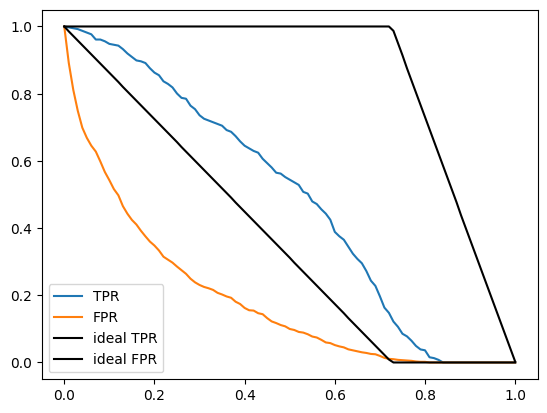

In [106]:
plt.plot(df_scores.threshold, df_scores['tpr'], label='TPR')
plt.plot(df_scores.threshold, df_scores['fpr'], label='FPR')
 
#plt.plot(df_rand.threshold, df_rand['tpr'], label='TPR')
#plt.plot(df_rand.threshold, df_rand['fpr'], label='FPR')
 
plt.plot(df_ideal.threshold, df_ideal['tpr'], label='ideal TPR', color = 'black')
plt.plot(df_ideal.threshold, df_ideal['fpr'], label='ideal FPR', color = 'black')
 
plt.legend()

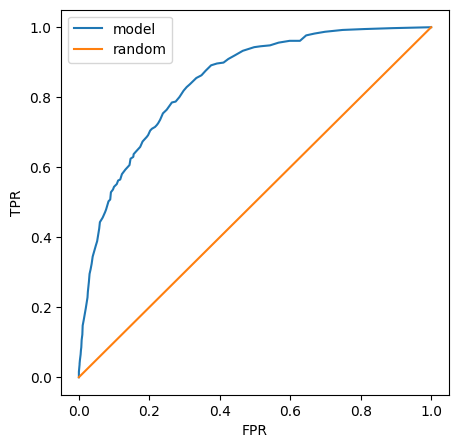

In [107]:
plt.figure(figsize=(5,5))
 
plt.plot(df_scores.fpr, df_scores.tpr, label='model')
plt.plot([0,1], [0,1], label='random')
#plt.plot(df_rand.fpr, df_rand.tpr, label='random')
#plt.plot(df_ideal.fpr, df_ideal.tpr, label='ideal')
 
plt.xlabel('FPR')
plt.ylabel('TPR')
 
plt.legend()

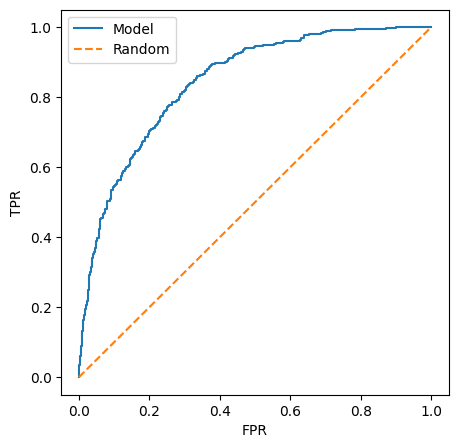

In [108]:
# We can also use the ROC functionality of scikit learn package
from sklearn.metrics import roc_curve
 
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
 
plt.figure(figsize=(5,5))
 
plt.plot(fpr, tpr, label='Model')
plt.plot([0,1], [0,1], label='Random', linestyle='--')
 
plt.xlabel('FPR')
plt.ylabel('TPR')
 
plt.legend()

## 4.6 Area Under the Curve (AUC)
_____

The ROC curve is a graphical representation of the performance of a classification model. It shows the trade-off between the true positive rate (TPR) and the false positive rate (FPR) at different thresholds. The ROC curve is a useful tool for comparing the performance of different classification algorithms. 

- The area under the ROC curve (AUC) is a measure of the performance of a classification model. It is a value between 0 and 1, with higher values indicating better performance. 

- A model with an AUC of 1 is perfect, while a model with an AUC of 0.5 is no better than random guessing.

In [109]:
from sklearn.metrics import auc

# calculating the area under the curve for all the models
print(auc(fpr, tpr))

print(auc(df_scores.fpr, df_scores.tpr))

print(auc(df_ideal.fpr, df_ideal.tpr))

0.8438327787316589
0.8437757991075725
0.9999430203759136


In [110]:

# auc score using scikit learn
from sklearn.metrics import roc_auc_score
 
roc_auc_score(y_val, y_pred)


0.8438327787316589

In [111]:
# calculating the area under the curve for all the models
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
auc(fpr, tpr)

0.8438327787316589

In [112]:
neg = y_pred[y_val == 0]
pos = y_pred[y_val == 1]

In [113]:
neg = y_pred[y_val == 0]
pos = y_pred[y_val == 1]
 
np.random.seed(1)
neg_choice = np.random.randint(low=0, high=len(neg), size=10000)
pos_choice = np.random.randint(low=0, high=len(pos), size=10000)

(pos[pos_choice] > neg[neg_choice]).mean()

0.8426

## 4.7 Cross-Validation
_____

The cross validation is a technique used to evaluate the performance of a classification model. It involves splitting the data into multiple subsets, training the model on one subset, and testing it on another. This process is repeated multiple times, with different subsets used for training and testing each time. The results are then averaged to give an overall measure of the model's performance.

The cross validation is a useful technique for evaluating the performance of a classification model. It helps to ensure that the model is not overfitting the data and that it generalizes well to new data.

In [122]:
def train(df_train, y_train):
    dicts = df_train[categorical + numerical].to_dict(orient='records')  # Prepare data for encoding
    
    dv = DictVectorizer(sparse=False)  # Encoder for one-hot encoding
    X_train = dv.fit_transform(dicts)  # Transform data

    model = LogisticRegression()  # Initialize model
    model.fit(X_train, y_train)  # Train model on training data

    return dv, model  # Return encoder and model


In [123]:
dv, model = train(df_train, y_train)

In [124]:
def predict(df, dv, model):
     dicts = df[categorical + numerical].to_dict(orient='records')  # Prepare data for encoding
     X = dv.transform(dicts)  # Transform data using existing encoder
     y_pred = model.predict_proba(X)[:,1]  # Get prediction probabilities

     return y_pred

In [130]:

y_pred = predict(df_val, dv, model)
y_pred

array([0.00894982, 0.20532809, 0.21311907, ..., 0.13630158, 0.80003335,
       0.83763101])

In [145]:
from sklearn.model_selection import KFold
 
kfold = KFold(n_splits=10, shuffle=True, random_state=1) 
kfold.split(df_full_train)

<generator object _BaseKFold.split at 0x14e858350>

In [146]:
train_idx, val_idx = next(kfold.split(df_full_train))
len(train_idx), len(val_idx)

(5070, 564)

In [147]:
len(df_full_train)

5634

In [148]:
# We can use iloc to select a part of this dataframe
df_train = df_full_train.iloc[train_idx]
df_val = df_full_train.iloc[val_idx]



In [150]:
df_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
1814,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
5946,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
3881,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
2389,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
611,4765-oxppd,female,0,yes,yes,9,yes,no,dsl,yes,...,yes,yes,no,no,month-to-month,no,mailed_check,65.00,663.05,1


In [152]:
df_val.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
3676,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0
6672,2346-czyil,male,0,no,no,27,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,credit_card_(automatic),20.35,531.60,0
6203,1090-pykci,female,0,yes,yes,69,yes,yes,fiber_optic,yes,...,yes,yes,yes,no,one_year,yes,credit_card_(automatic),105.10,7234.80,0
1374,8999-ypybv,male,0,yes,yes,45,yes,no,dsl,yes,...,yes,yes,yes,yes,two_year,yes,mailed_check,84.35,3858.05,0
4902,5092-stpkp,female,0,no,no,24,yes,no,dsl,yes,...,no,yes,no,no,month-to-month,no,credit_card_(automatic),56.35,1381.20,0


In [137]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

kfold = KFold(n_splits=10, shuffle=True, random_state=1)

scores = []

for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    y_train = df_train.churn.values
    y_val = df_val.churn.values

    dv, model = train(df_train, y_train)  # Train model
    y_pred = predict(df_val, dv, model)   # Get predictions

    auc = roc_auc_score(y_val, y_pred)    # Calculate AUC score for validation fold
    scores.append(auc)                    # Store the score

scores

# Example Output:
# [0.8479, 0.8410, 0.8557, 0.8333, 0.8262, 0.8342, 0.8412, 0.8186, 0.8452, 0.8621]


[0.8479080196555507,
 0.8410272277227722,
 0.8557048652060528,
 0.8344580692947082,
 0.827605459057072,
 0.8374125874125875,
 0.8429338977531748,
 0.8186195445920303,
 0.8454868830591373,
 0.86198783234177]

In [139]:
from sklearn.model_selection import KFold
!pip3 install tqdm
from tqdm.auto import tqdm

kfold = KFold(n_splits=10, shuffle=True, random_state=1)
scores = []

for train_idx, val_idx in tqdm(kfold.split(df_full_train)):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    y_train = df_train.churn.values
    y_val = df_val.churn.values

    dv, model = train(df_train, y_train)
    y_pred = predict(df_val, dv, model)

    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

scores
# Example Output: [0.8479, 0.8410, 0.8557, 0.8333, 0.8262, 0.8342, 0.8412, 0.8186, 0.8452, 0.8621]

10it [00:06,  1.61it/s]


[0.8479080196555507,
 0.8410272277227722,
 0.8557048652060528,
 0.8344580692947082,
 0.827605459057072,
 0.8374125874125875,
 0.8429338977531748,
 0.8186195445920303,
 0.8454868830591373,
 0.86198783234177]

In [140]:
print('%.3f +- %.3f' % (np.mean(scores), np.std(scores)))

0.841 +- 0.012


## 4.8 Finding the best parameters
____

In [141]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical + numerical].to_dict(orient='records')
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(C=C, max_iter=1000)
    model.fit(X_train, y_train)

    return dv, model


In [142]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
import numpy as np

kfold = KFold(n_splits=10, shuffle=True, random_state=1)  

for C in [0.001, 0.01, 0.1, 0.5, 1, 5, 10]:
    scores = []
    
    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.churn.values
        y_val = df_val.churn.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%s %.3f ± %.3f' % (C, np.mean(scores), np.std(scores)))


C=0.001 0.826 ± 0.012
C=0.01 0.841 ± 0.012
C=0.1 0.843 ± 0.012
C=0.5 0.843 ± 0.012
C=1 0.843 ± 0.012
C=5 0.843 ± 0.012
C=10 0.843 ± 0.012


In [143]:
from tqdm.auto import tqdm

for C in tqdm([0.001, 0.01, 0.1, 0.5, 1, 5, 10]):
    scores = []
    kfold = KFold(n_splits=5, shuffle=True, random_state=1)  
    
    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.churn.values
        y_val = df_val.churn.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%s %.3f ± %.3f' % (C, np.mean(scores), np.std(scores)))


 14%|█▍        | 1/7 [00:06<00:40,  6.73s/it]

C=0.001 0.825 ± 0.009


 29%|██▊       | 2/7 [00:13<00:34,  6.90s/it]

C=0.01 0.840 ± 0.008


 43%|████▎     | 3/7 [00:18<00:24,  6.09s/it]

C=0.1 0.842 ± 0.007


 57%|█████▋    | 4/7 [00:25<00:18,  6.25s/it]

C=0.5 0.842 ± 0.007


 71%|███████▏  | 5/7 [00:30<00:11,  5.98s/it]

C=1 0.842 ± 0.007


 86%|████████▌ | 6/7 [00:39<00:07,  7.01s/it]

C=5 0.842 ± 0.007


100%|██████████| 7/7 [00:48<00:00,  6.93s/it]

C=10 0.842 ± 0.007


In [154]:

dv, model = train(df_full_train, df_full_train.churn.values, C=0.5)
y_pred = predict(df_test, dv, model)

auc = roc_auc_score(y_test, y_pred)
auc


0.8583382083698962